In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cse493g1/assignments/assignment3/'
FOLDERNAME = 'cse493g1/assignments/assignment3/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the COCO dataset to your Drive
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME/cse493g1/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/cse493g1/assignments/assignment3/cse493g1/datasets
/content/drive/My Drive/cse493g1/assignments/assignment3


# Multi-Layer Fully Connected Network Part 2
In this exercise, you will extend your fully connected network from Assignment 2 with Dropout and Normalization Layers. First, you will copy and paste all the necessary parts from Assignment 2. Then you will re-train your model from A2 as a baseline. Next, you will complete the batchnorm and dropout notebook, and then return to this notebook and create an improved model using dropout and normalization.

In [4]:
# Setup cell.
import time
import numpy as np
import matplotlib.pyplot as plt
from cse493g1.classifiers.fc_net import *
from cse493g1.data_utils import get_CIFAR10_data
from cse493g1.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cse493g1.solver import Solver

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # Set default size of plots.
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """Returns relative error."""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [5]:
# Load the (preprocessed) CIFAR-10 data.
data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(f"{k}: {v.shape}")

X_train: (49000, 3, 32, 32)
y_train: (49000,)
X_val: (1000, 3, 32, 32)
y_val: (1000,)
X_test: (1000, 3, 32, 32)
y_test: (1000,)


# Copy necessary parts from A2.
Fill in the following functions by copying and pasting your answers from A2:
`affine_forward` in `cse493g1/layers.py`
`affine_backward` in `cse493g1/layers.py`
`relu_forward` in `cse493g1/layers.py`
`relu_backward` in `cse493g1/layers.py`
`softmax_loss` in `cse493g1/layers.py`
`sgd_momentum` in `cse493g1/optim.py`
`rmsprop` in `cse493g1/optim.py`
`adam` in `cse493g1/optim.py`



# Train baseline model from A2
Copy and Paste your `FullyConnectedNet` model from `cse493g1/classifiers/fc_net.py` in Assignment 2 into `FullyConnectedNetBasic` in the file `cse493g1/classifiers/fc_net.py` in this assignment. Use the best hyperparms that you found from the previous assignment to train this model. Call this model `best_model_basic`

(Iteration 1 / 39200) loss: 136.025363
(Epoch 0 / 20) train acc: 0.108000; val_acc: 0.107000
(Iteration 11 / 39200) loss: 34.201549
(Iteration 21 / 39200) loss: 19.649691
(Iteration 31 / 39200) loss: 17.571646
(Iteration 41 / 39200) loss: 13.036979
(Iteration 51 / 39200) loss: 15.432630
(Iteration 61 / 39200) loss: 14.035347
(Iteration 71 / 39200) loss: 15.253355
(Iteration 81 / 39200) loss: 9.394079
(Iteration 91 / 39200) loss: 8.834803
(Iteration 101 / 39200) loss: 11.137217
(Iteration 111 / 39200) loss: 8.550465
(Iteration 121 / 39200) loss: 6.022767
(Iteration 131 / 39200) loss: 9.207627
(Iteration 141 / 39200) loss: 9.160192
(Iteration 151 / 39200) loss: 9.442897
(Iteration 161 / 39200) loss: 9.698607
(Iteration 171 / 39200) loss: 7.549053
(Iteration 181 / 39200) loss: 9.846977
(Iteration 191 / 39200) loss: 7.382191
(Iteration 201 / 39200) loss: 9.222998
(Iteration 211 / 39200) loss: 7.341811
(Iteration 221 / 39200) loss: 7.060704
(Iteration 231 / 39200) loss: 7.809970
(Iteration 

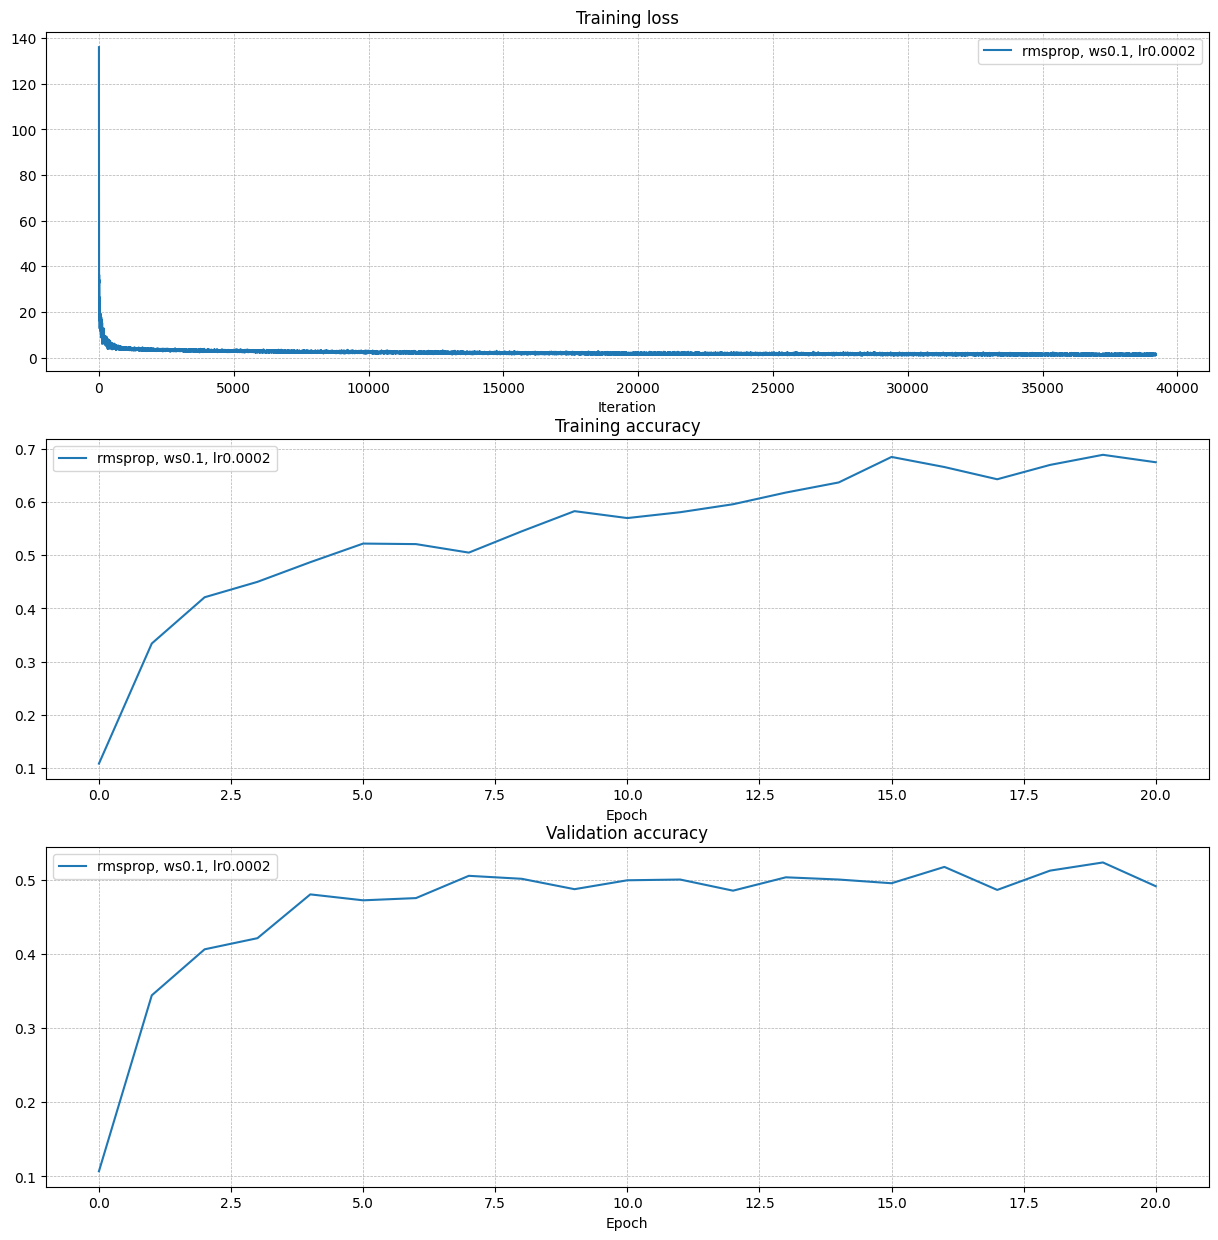

In [7]:
best_model_basic = None

################################################################################
# TODO: Train the best FullyConnectedNetBasic that you can on CIFAR-10. Store your best model in  #
# the best_model_basic variable.                                                     #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

weight_scale = [1e-1]
learning_rate = [2e-4]
update_rule = ['rmsprop']
reg = [1e-3]

results = {}
best_val = 0
best_solver = None
solvers = {}

for i in weight_scale:
  for j in learning_rate:
    for rule in update_rule:
      model = FullyConnectedNetBasic(
          [100, 100, 100, 100, 100],
          weight_scale = i,
          dtype=np.float64,
          reg = reg[0],
      )
      solver = Solver(
          model,
          data,
          print_every=10,
          num_epochs=20,
          batch_size=25,
          update_rule= rule,
          optim_config={"learning_rate": j},
      )
      solver.train()

      solvers[(i,j,rule)] = solver

      if solver.best_val_acc > best_val:
          best_model = model
          best_solver = solver
          best_val = solver.best_val_acc

      results[(i,j,rule)] = (solver.train_acc_history[len(solver.train_acc_history) - 1], solver.best_val_acc)

# Print out results.
for i, j, rule in sorted(results):
    train_accuracy, val_accuracy = results[(i,j,rule)]
    print('weight_scale  %e lr %e rule %s train accuracy: %f val accuracy: %f' % (
                i, j, rule, train_accuracy, val_accuracy))

print('best val accuracy achieved: %f' % best_val)

# Print out results.
for i, j, rule in sorted(results):
    train_accuracy, val_accuracy = results[(i,j,rule)]
    print('weight_scale  %e lr %e rule %s train accuracy: %f val accuracy: %f' % (
                i, j, rule, train_accuracy, val_accuracy))

print('best val accuracy achieved: %f' % best_val)

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].set_title('Training loss')
axes[0].set_xlabel('Iteration')
axes[1].set_title('Training accuracy')
axes[1].set_xlabel('Epoch')
axes[2].set_title('Validation accuracy')
axes[2].set_xlabel('Epoch')

for (i,j, update_rule), solver in solvers.items():
    axes[0].plot(solver.loss_history, label=f"{update_rule}, ws{i}, lr{j}")
    axes[1].plot(solver.train_acc_history, label=f"{update_rule}, ws{i}, lr{j}")
    axes[2].plot(solver.val_acc_history, label=f"{update_rule}, ws{i}, lr{j}")

for ax in axes:
    ax.legend(loc='best', ncol=4)
    ax.grid(linestyle='--', linewidth=0.5)

plt.show()


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Evaluate baseline model from A2
Evaluate above baseline model.

In [10]:
best_model_basic = best_model

In [11]:
y_test_pred = np.argmax(best_model_basic.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model_basic.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.523
Test set accuracy:  0.504


# Train improved model
Design a new model in `FullyConnectedNetImproved` in the file `cse493g1/classifiers/fc_net.py`. You can start by having `FullyConnectedNetImproved` be the same design as `FullyConnectedNetBasic`. Next, complete the BatchNormoralization.ipynb and Dropout.ipynb notebooks. Then return to this notebook and complete `FullyConnectedNetImproved` by adding in batchnorm and dropout. Try to beat the accuracy of your baseline model! You may have to adjust your hyperparameters.

(Iteration 1 / 39200) loss: 2.525122
(Epoch 0 / 20) train acc: 0.122000; val_acc: 0.089000
(Iteration 11 / 39200) loss: 2.467785
(Iteration 21 / 39200) loss: 2.616635
(Iteration 31 / 39200) loss: 2.337299
(Iteration 41 / 39200) loss: 2.354122
(Iteration 51 / 39200) loss: 2.346690
(Iteration 61 / 39200) loss: 2.435356
(Iteration 71 / 39200) loss: 2.226873
(Iteration 81 / 39200) loss: 2.168396
(Iteration 91 / 39200) loss: 2.203394
(Iteration 101 / 39200) loss: 2.301686
(Iteration 111 / 39200) loss: 2.002435
(Iteration 121 / 39200) loss: 2.528594
(Iteration 131 / 39200) loss: 2.359258
(Iteration 141 / 39200) loss: 2.417357
(Iteration 151 / 39200) loss: 2.048365
(Iteration 161 / 39200) loss: 2.222106
(Iteration 171 / 39200) loss: 2.155491
(Iteration 181 / 39200) loss: 2.210556
(Iteration 191 / 39200) loss: 2.106343
(Iteration 201 / 39200) loss: 2.336861
(Iteration 211 / 39200) loss: 2.116210
(Iteration 221 / 39200) loss: 2.276643
(Iteration 231 / 39200) loss: 2.143781
(Iteration 241 / 3920

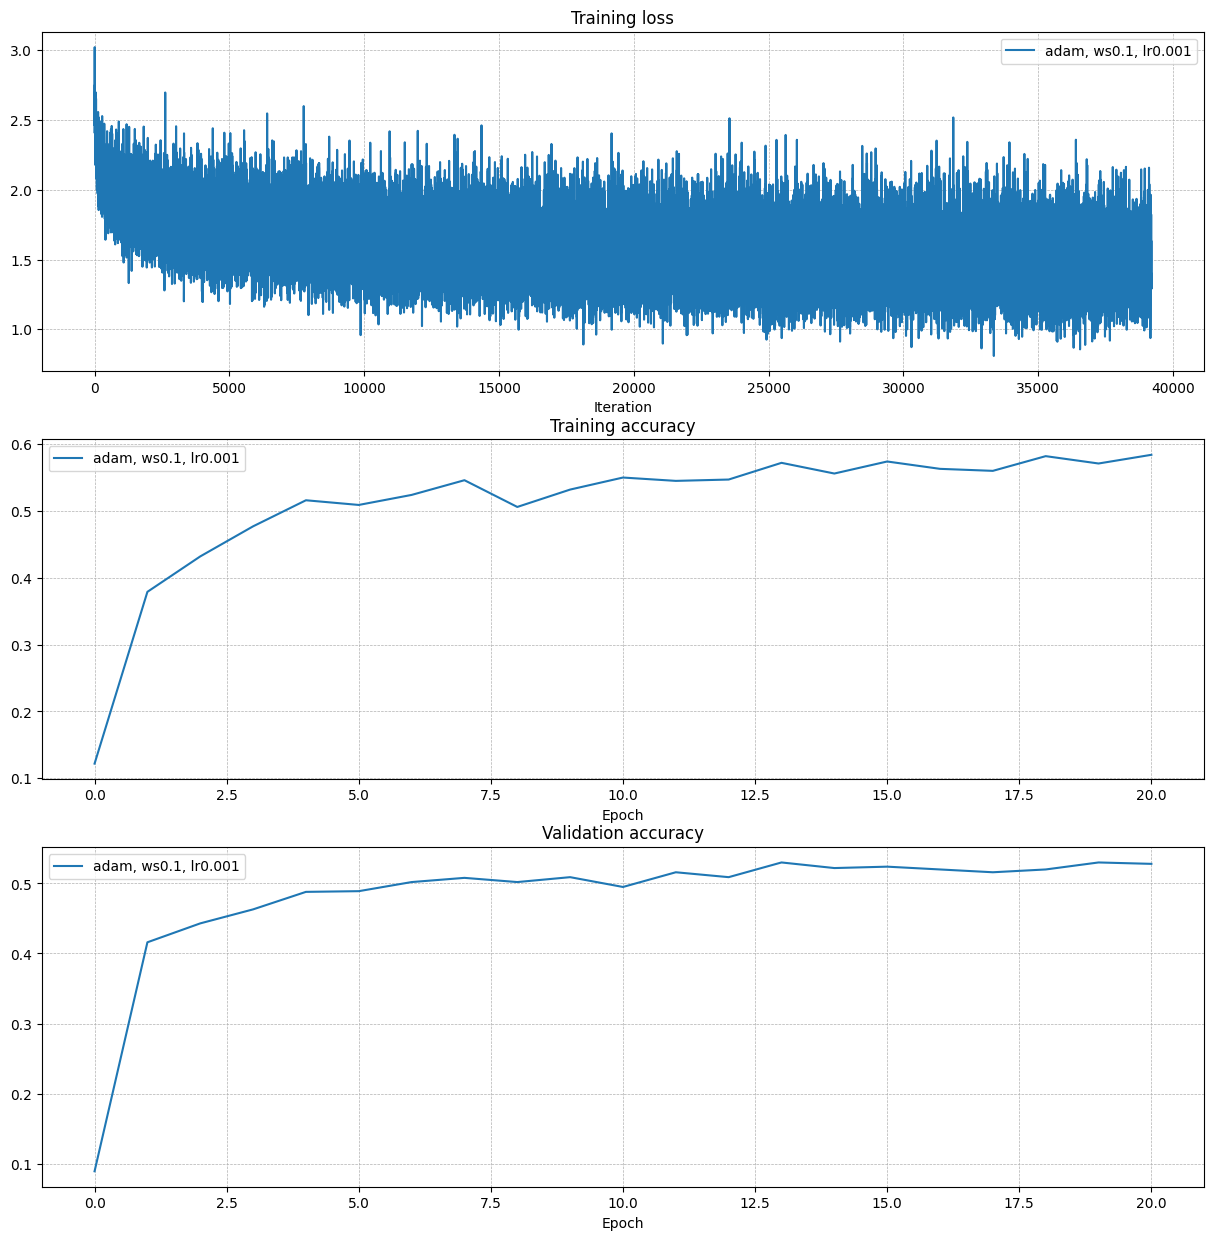

In [20]:
best_model_improved = None

################################################################################
# TODO: Train the best FullyConnectedNetImproved that you can on CIFAR-10. You might   #
# find batch/layer normalization and dropout useful. Store your best model in  #
# the best_mode_improved variable.                                                     #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

weight_scale = [1e-1]
learning_rate = [1e-3]
update_rule = ['adam']
reg = [0]

results = {}
best_val = 0
best_solver = None
solvers = {}

for i in weight_scale:
  for j in learning_rate:
    for rule in update_rule:
      model = FullyConnectedNetImproved(
          [100, 100, 100, 100, 100],
          input_dim=3 * 32 * 32,
          num_classes=10,
          dropout_keep_ratio=0.75,
          normalization='batchnorm',
          reg=reg[0],
          weight_scale=i,
          dtype=np.float32,
          seed=None,
      )
      solver = Solver(
          model,
          data,
          print_every=10,
          num_epochs=20,
          batch_size=25,
          update_rule= rule,
          optim_config={"learning_rate": j},
      )
      solver.train()

      solvers[(i,j,rule)] = solver

      if solver.best_val_acc > best_val:
          best_model_improved = model
          best_solver = solver
          best_val = solver.best_val_acc

      results[(i,j,rule)] = (solver.train_acc_history[len(solver.train_acc_history) - 1], solver.best_val_acc)

# Print out results.
for i, j, rule in sorted(results):
    train_accuracy, val_accuracy = results[(i,j,rule)]
    print('weight_scale  %e lr %e rule %s train accuracy: %f val accuracy: %f' % (
                i, j, rule, train_accuracy, val_accuracy))

print('best val accuracy achieved: %f' % best_val)


fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].set_title('Training loss')
axes[0].set_xlabel('Iteration')
axes[1].set_title('Training accuracy')
axes[1].set_xlabel('Epoch')
axes[2].set_title('Validation accuracy')
axes[2].set_xlabel('Epoch')

for (i,j, update_rule), solver in solvers.items():
    axes[0].plot(solver.loss_history, label=f"{update_rule}, ws{i}, lr{j}")
    axes[1].plot(solver.train_acc_history, label=f"{update_rule}, ws{i}, lr{j}")
    axes[2].plot(solver.val_acc_history, label=f"{update_rule}, ws{i}, lr{j}")

for ax in axes:
    ax.legend(loc='best', ncol=4)
    ax.grid(linestyle='--', linewidth=0.5)

plt.show()


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Test Your Model!
Run your best model on the validation and test sets. Are you able to outperform the baseline model that has no Batchnorm or Dropout?

In [21]:
y_test_pred = np.argmax(best_model_improved.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model_improved.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.497
Test set accuracy:  0.52
